## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [7]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)  
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [10]:
model = build_mlp()
model.summary()
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________

In [11]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 44s 878us/step - loss: 1.9598 - accuracy: 0.2940 - val_loss: 1.8267 - val_accuracy: 0.3628
Epoch 2/500
50000/50000 [==============================] - 18s 368us/step - loss: 1.7201 - accuracy: 0.3847 - val_loss: 1.6660 - val_accuracy: 0.4049
Epoch 3/500
50000/50000 [==============================] - 18s 358us/step - loss: 1.6287 - accuracy: 0.4199 - val_loss: 1.5989 - val_accuracy: 0.4353
Epoch 4/500
50000/50000 [==============================] - 18s 358us/step - loss: 1.5651 - accuracy: 0.4414 - val_loss: 1.5717 - val_accuracy: 0.4393
Epoch 5/500
50000/50000 [==============================] - 19s 375us/step - loss: 1.5131 - accuracy: 0.4571 - val_loss: 1.5138 - val_accuracy: 0.4549
Epoch 6/500
50000/50000 [==============================] - 19s 375us/step - loss: 1.4779 - accuracy: 0.4715 - val_loss: 1.4802 - val_accuracy: 0.4722
Epoch 7/500
50000/50000 [=========================

50000/50000 [==============================] - 18s 370us/step - loss: 0.6123 - accuracy: 0.7797 - val_loss: 1.9547 - val_accuracy: 0.5013
Epoch 55/500
50000/50000 [==============================] - 18s 351us/step - loss: 0.6171 - accuracy: 0.7771 - val_loss: 2.0207 - val_accuracy: 0.4908
Epoch 56/500
50000/50000 [==============================] - 20s 401us/step - loss: 0.5845 - accuracy: 0.7884 - val_loss: 1.9757 - val_accuracy: 0.5045
Epoch 57/500
50000/50000 [==============================] - 20s 392us/step - loss: 0.5854 - accuracy: 0.7897 - val_loss: 1.9157 - val_accuracy: 0.5081
Epoch 58/500
50000/50000 [==============================] - 19s 379us/step - loss: 0.5707 - accuracy: 0.7955 - val_loss: 2.0730 - val_accuracy: 0.5080
Epoch 59/500
50000/50000 [==============================] - 18s 359us/step - loss: 0.5757 - accuracy: 0.7921 - val_loss: 2.0949 - val_accuracy: 0.5020
Epoch 60/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.5577 - accuracy: 0.800

50000/50000 [==============================] - 17s 341us/step - loss: 0.2744 - accuracy: 0.9005 - val_loss: 3.2921 - val_accuracy: 0.4977
Epoch 109/500
50000/50000 [==============================] - 17s 339us/step - loss: 0.2700 - accuracy: 0.9021 - val_loss: 3.5530 - val_accuracy: 0.4904
Epoch 110/500
50000/50000 [==============================] - 17s 339us/step - loss: 0.2906 - accuracy: 0.8958 - val_loss: 3.5022 - val_accuracy: 0.5012
Epoch 111/500
50000/50000 [==============================] - 17s 339us/step - loss: 0.3320 - accuracy: 0.8809 - val_loss: 3.3974 - val_accuracy: 0.4984
Epoch 112/500
50000/50000 [==============================] - 17s 343us/step - loss: 0.2778 - accuracy: 0.8997 - val_loss: 3.3679 - val_accuracy: 0.4992
Epoch 113/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.2649 - accuracy: 0.9050 - val_loss: 3.5789 - val_accuracy: 0.4920
Epoch 114/500
50000/50000 [==============================] - 17s 337us/step - loss: 0.2994 - accuracy:

Epoch 162/500
50000/50000 [==============================] - 17s 336us/step - loss: 0.2008 - accuracy: 0.9283 - val_loss: 4.4427 - val_accuracy: 0.4924
Epoch 163/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.1544 - accuracy: 0.9449 - val_loss: 4.6141 - val_accuracy: 0.4938
Epoch 164/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.2287 - accuracy: 0.9204 - val_loss: 4.4375 - val_accuracy: 0.4830
Epoch 165/500
50000/50000 [==============================] - 17s 334us/step - loss: 0.1851 - accuracy: 0.9350 - val_loss: 4.6068 - val_accuracy: 0.5008
Epoch 166/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.1860 - accuracy: 0.9347 - val_loss: 4.5742 - val_accuracy: 0.5001
Epoch 167/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.2010 - accuracy: 0.9290 - val_loss: 4.5857 - val_accuracy: 0.4949
Epoch 168/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.19

Epoch 216/500
50000/50000 [==============================] - 17s 335us/step - loss: 0.0899 - accuracy: 0.9683 - val_loss: 5.5547 - val_accuracy: 0.4959
Epoch 217/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.1147 - accuracy: 0.9595 - val_loss: 5.5665 - val_accuracy: 0.4925
Epoch 218/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.1889 - accuracy: 0.9347 - val_loss: 5.1968 - val_accuracy: 0.4954
Epoch 219/500
50000/50000 [==============================] - 17s 334us/step - loss: 0.2137 - accuracy: 0.9272 - val_loss: 5.4064 - val_accuracy: 0.4921
Epoch 220/500
50000/50000 [==============================] - 17s 335us/step - loss: 0.1630 - accuracy: 0.9439 - val_loss: 5.4286 - val_accuracy: 0.4947
Epoch 221/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.0940 - accuracy: 0.9671 - val_loss: 5.3694 - val_accuracy: 0.4972
Epoch 222/500
50000/50000 [==============================] - 17s 334us/step - loss: 0.09

Epoch 270/500
50000/50000 [==============================] - 17s 337us/step - loss: 0.2069 - accuracy: 0.9331 - val_loss: 5.6605 - val_accuracy: 0.4860
Epoch 271/500
50000/50000 [==============================] - 17s 336us/step - loss: 0.0987 - accuracy: 0.9664 - val_loss: 5.7314 - val_accuracy: 0.4976
Epoch 272/500
50000/50000 [==============================] - 17s 337us/step - loss: 0.0683 - accuracy: 0.9766 - val_loss: 6.0306 - val_accuracy: 0.4989
Epoch 273/500
50000/50000 [==============================] - 17s 339us/step - loss: 0.1107 - accuracy: 0.9617 - val_loss: 5.8941 - val_accuracy: 0.4935
Epoch 274/500
50000/50000 [==============================] - 17s 335us/step - loss: 0.1183 - accuracy: 0.9594 - val_loss: 6.0209 - val_accuracy: 0.4919
Epoch 275/500
50000/50000 [==============================] - 17s 335us/step - loss: 0.1739 - accuracy: 0.9414 - val_loss: 5.7728 - val_accuracy: 0.4823
Epoch 276/500
50000/50000 [==============================] - 17s 335us/step - loss: 0.13

Epoch 324/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.1949 - accuracy: 0.9373 - val_loss: 5.9505 - val_accuracy: 0.4940
Epoch 325/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.0878 - accuracy: 0.9703 - val_loss: 6.0783 - val_accuracy: 0.4951
Epoch 326/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.0650 - accuracy: 0.9782 - val_loss: 6.2225 - val_accuracy: 0.4998
Epoch 327/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.0546 - accuracy: 0.9819 - val_loss: 6.3305 - val_accuracy: 0.4935
Epoch 328/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.0768 - accuracy: 0.9737 - val_loss: 6.4144 - val_accuracy: 0.4990
Epoch 329/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.1588 - accuracy: 0.9490 - val_loss: 6.3373 - val_accuracy: 0.4839
Epoch 330/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.17

Epoch 378/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.1079 - accuracy: 0.9654 - val_loss: 6.5312 - val_accuracy: 0.4945
Epoch 379/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.0634 - accuracy: 0.9789 - val_loss: 6.5785 - val_accuracy: 0.5036
Epoch 380/500
50000/50000 [==============================] - 17s 334us/step - loss: 0.0500 - accuracy: 0.9832 - val_loss: 6.9989 - val_accuracy: 0.4911
Epoch 381/500
50000/50000 [==============================] - 17s 334us/step - loss: 0.1232 - accuracy: 0.9602 - val_loss: 6.7642 - val_accuracy: 0.4817
Epoch 382/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.1866 - accuracy: 0.9418 - val_loss: 6.3854 - val_accuracy: 0.4953
Epoch 383/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.0778 - accuracy: 0.9740 - val_loss: 6.3398 - val_accuracy: 0.4984
Epoch 384/500
50000/50000 [==============================] - 17s 334us/step - loss: 0.02

Epoch 432/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.0995 - accuracy: 0.9677 - val_loss: 7.0131 - val_accuracy: 0.4919
Epoch 433/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.0645 - accuracy: 0.9783 - val_loss: 7.0669 - val_accuracy: 0.4924
Epoch 434/500
50000/50000 [==============================] - 17s 334us/step - loss: 0.0827 - accuracy: 0.9719 - val_loss: 6.9431 - val_accuracy: 0.4940
Epoch 435/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.1320 - accuracy: 0.9582 - val_loss: 6.6407 - val_accuracy: 0.4936
Epoch 436/500
50000/50000 [==============================] - 17s 331us/step - loss: 0.1429 - accuracy: 0.9546 - val_loss: 6.6751 - val_accuracy: 0.4957
Epoch 437/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.0411 - accuracy: 0.9865 - val_loss: 6.9056 - val_accuracy: 0.4981
Epoch 438/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.01

Epoch 486/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.0066 - accuracy: 0.9995 - val_loss: 6.2666 - val_accuracy: 0.5064
Epoch 487/500
50000/50000 [==============================] - 17s 334us/step - loss: 0.0056 - accuracy: 0.9996 - val_loss: 6.4549 - val_accuracy: 0.5097
Epoch 488/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.0039 - accuracy: 0.9998 - val_loss: 6.6663 - val_accuracy: 0.5052
Epoch 489/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.0074 - accuracy: 0.9990 - val_loss: 6.7267 - val_accuracy: 0.5023
Epoch 490/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.1385 - accuracy: 0.9657 - val_loss: 6.2552 - val_accuracy: 0.4584
Epoch 491/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.3827 - accuracy: 0.8960 - val_loss: 4.9473 - val_accuracy: 0.5041
Epoch 492/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.04

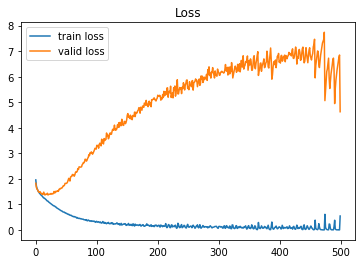

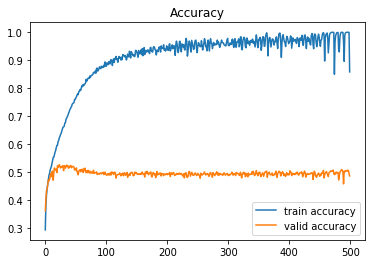

In [13]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()